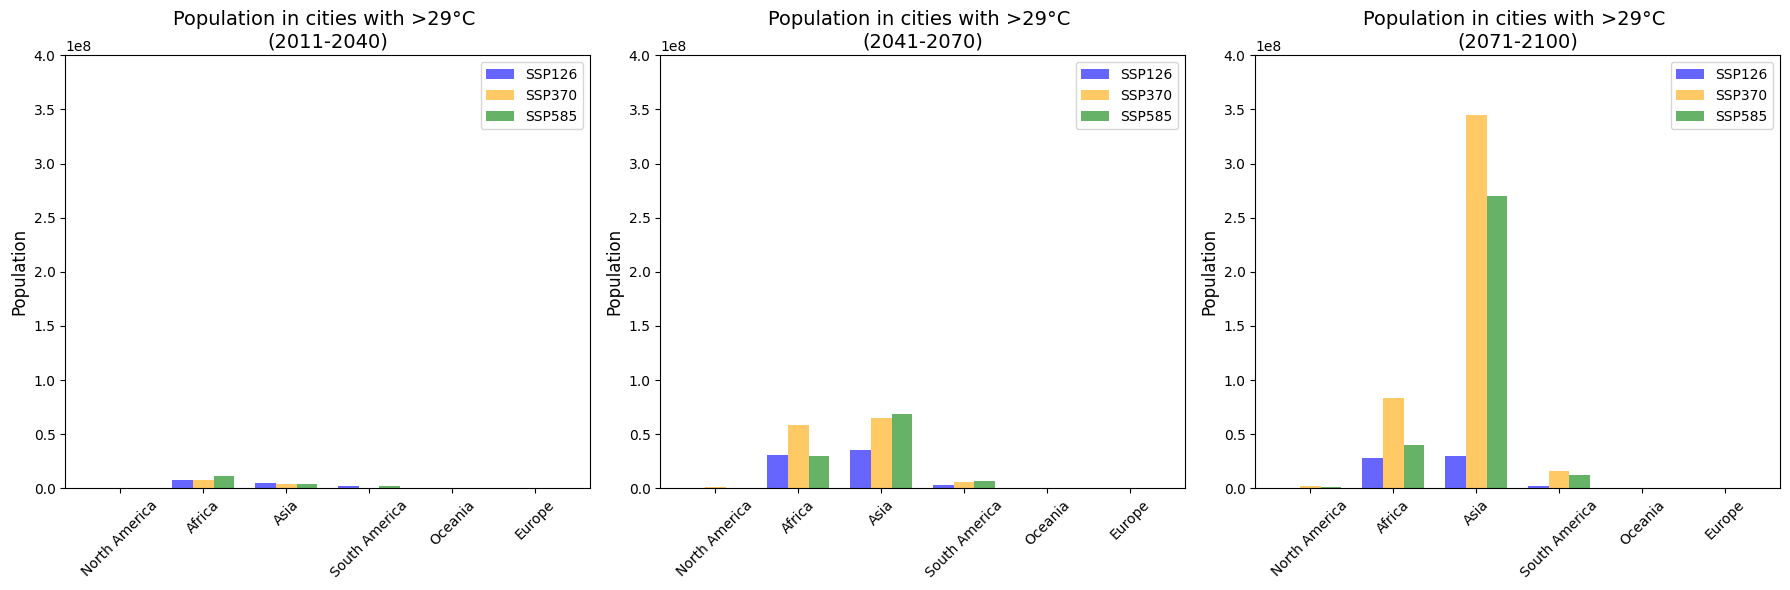

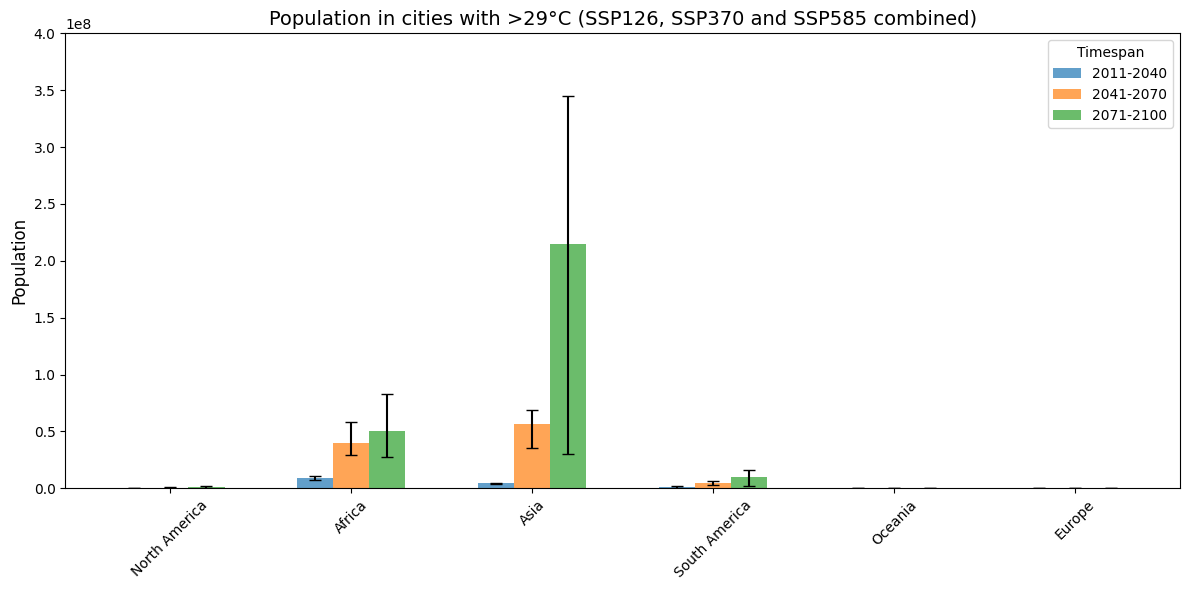

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read data from CSV files (as provided earlier)
csv_ssp1 = 'final_table_over_29_SSP1.csv'
csv_ssp3 = 'final_table_over_29_SSP3.csv'
csv_ssp5 = 'final_table_over_29_SSP5.csv'

# Read each CSV file into a dataframe
df_ssp1 = pd.read_csv(csv_ssp1)
df_ssp3 = pd.read_csv(csv_ssp3)
df_ssp5 = pd.read_csv(csv_ssp5)

# Combine the data for each period into a single dataframe
def combine_scenarios(df_ssp1, df_ssp3, df_ssp5, period_column_suffix):
    combined_df = pd.DataFrame({
        'Continent': df_ssp1['Continent'],
        'SSP1': df_ssp1[f'Total_Pop_{period_column_suffix}'],
        'SSP3': df_ssp3[f'Total_Pop_{period_column_suffix}'],
        'SSP5': df_ssp5[f'Total_Pop_{period_column_suffix}']
    })
    combined_df['Mean'] = combined_df[['SSP1', 'SSP3', 'SSP5']].mean(axis=1)
    combined_df['Min'] = combined_df[['SSP1', 'SSP3', 'SSP5']].min(axis=1)
    combined_df['Max'] = combined_df[['SSP1', 'SSP3', 'SSP5']].max(axis=1)
    return combined_df

# Combine data for each period
combined_2011_2040 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2011_2040')
combined_2041_2070 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2041_2070')
combined_2071_2100 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2071_2100')

# Step 2: Scenario-Specific Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.25  # Width of each bar

for i, (period, combined_df) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                              [combined_2011_2040, combined_2041_2070, combined_2071_2100])):
    x = np.arange(len(combined_df['Continent']))  # Create a range for the x positions
    axes[i].bar(x - bar_width, combined_df['SSP1'], width=bar_width, label='SSP126', alpha=0.6, color='blue')
    axes[i].bar(x, combined_df['SSP3'], width=bar_width, label='SSP370', alpha=0.6, color='orange')
    axes[i].bar(x + bar_width, combined_df['SSP5'], width=bar_width, label='SSP585', alpha=0.6, color='green')
    axes[i].set_title(f'Population in cities with >29°C \n({period})', fontsize=14)
    axes[i].set_ylabel('Population', fontsize=12)
    axes[i].set_ylim(0, 4e8)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(combined_df['Continent'], rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Step 3: Merged Scenario Plot with Uncertainty Bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(combined_2011_2040['Continent']))
bar_width = 0.2  # Width of each bar for merged plot

for i, (period, combined_df, offset) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                                      [combined_2011_2040, combined_2041_2070, combined_2071_2100],
                                                      [-bar_width, 0, bar_width])):
    ax.bar(x + offset, combined_df['Mean'], width=bar_width,
           yerr=[combined_df['Mean'] - combined_df['Min'], combined_df['Max'] - combined_df['Mean']],
           label=f'{period}', alpha=0.7, capsize=4)

ax.set_title('Population in cities with >29°C (SSP126, SSP370 and SSP585 combined)', fontsize=14)
ax.set_ylabel('Population', fontsize=12)
ax.set_ylim(0, 4e8)
ax.set_xticks(x)
ax.set_xticklabels(combined_2011_2040['Continent'], rotation=45)
ax.legend(title='Timespan')

plt.tight_layout()
plt.show()


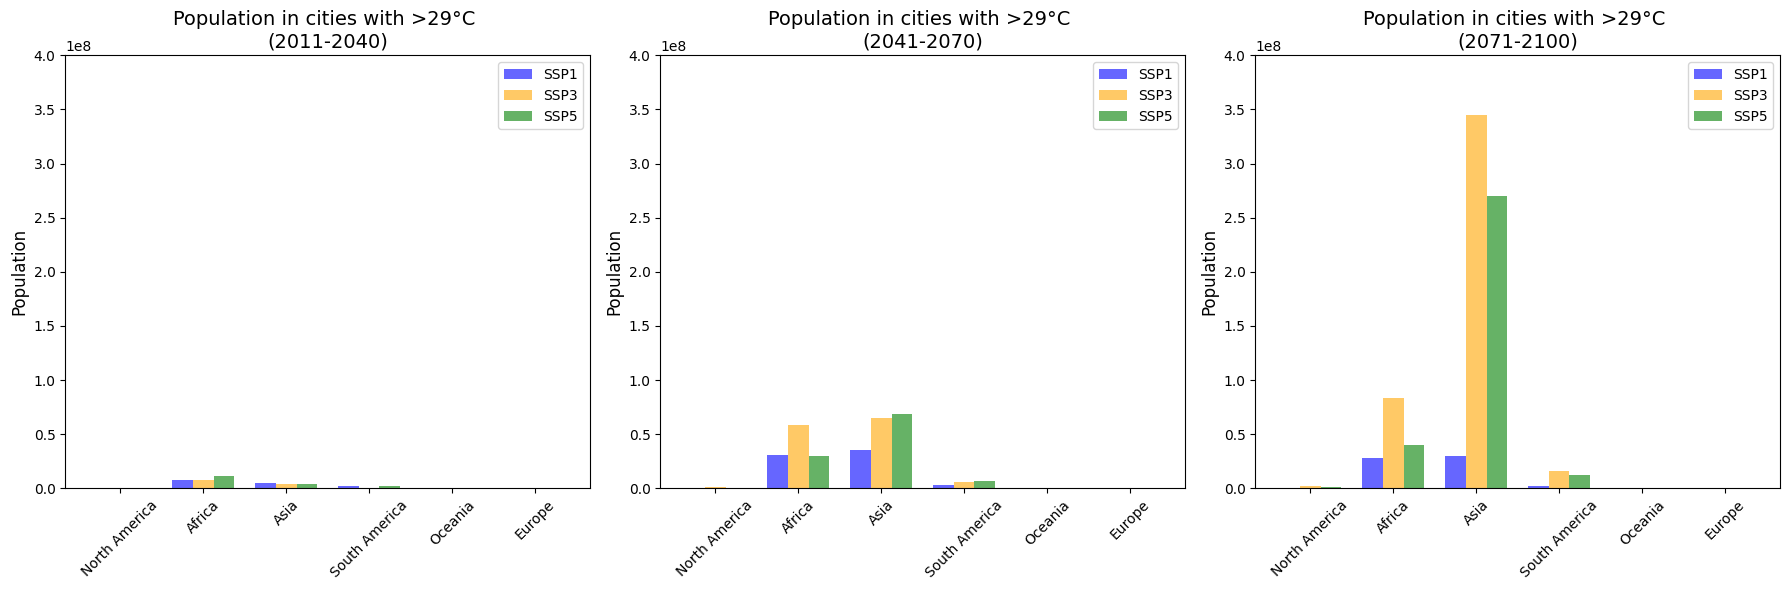

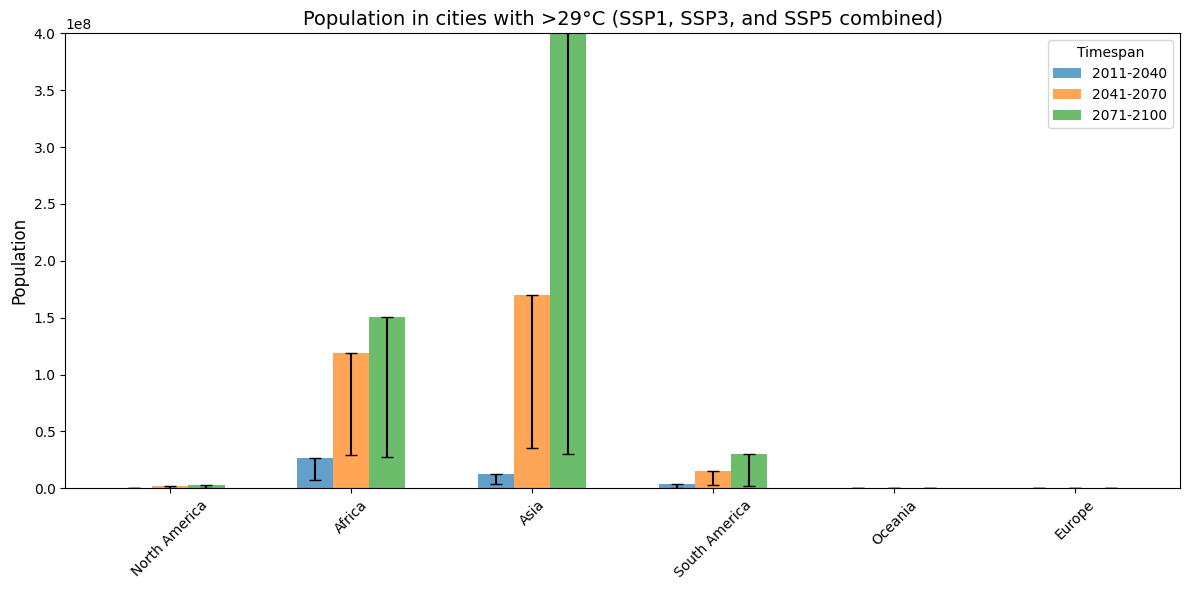

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read data from CSV files for over 29°C populations
csv_ssp1 = 'final_table_over_29_SSP1.csv'
csv_ssp3 = 'final_table_over_29_SSP3.csv'
csv_ssp5 = 'final_table_over_29_SSP5.csv'

# Read each CSV file into a dataframe
df_ssp1 = pd.read_csv(csv_ssp1)
df_ssp3 = pd.read_csv(csv_ssp3)
df_ssp5 = pd.read_csv(csv_ssp5)

# Combine the data for each period into a single dataframe
def combine_scenarios(df_ssp1, df_ssp3, df_ssp5, period_column_suffix):
    combined_df = pd.DataFrame({
        'Continent': df_ssp1['Continent'],
        'SSP1': df_ssp1[f'Total_Pop_{period_column_suffix}'],
        'SSP3': df_ssp3[f'Total_Pop_{period_column_suffix}'],
        'SSP5': df_ssp5[f'Total_Pop_{period_column_suffix}']
    })
    combined_df['Mean'] = combined_df[['SSP1', 'SSP3', 'SSP5']].mean(axis=1)
    combined_df['Sum'] = combined_df[['SSP1', 'SSP3', 'SSP5']].sum(axis=1)
    combined_df['Min'] = combined_df[['SSP1', 'SSP3', 'SSP5']].min(axis=1)
    combined_df['Max'] = combined_df[['SSP1', 'SSP3', 'SSP5']].max(axis=1)
    return combined_df

# Combine data for each period
combined_2011_2040 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2011_2040')
combined_2041_2070 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2041_2070')
combined_2071_2100 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2071_2100')

# Step 2: Scenario-Specific Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.25  # Width of each bar

for i, (period, combined_df) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                              [combined_2011_2040, combined_2041_2070, combined_2071_2100])):
    x = np.arange(len(combined_df['Continent']))  # Create a range for the x positions
    axes[i].bar(x - bar_width, combined_df['SSP1'], width=bar_width, label='SSP1', alpha=0.6, color='blue')
    axes[i].bar(x, combined_df['SSP3'], width=bar_width, label='SSP3', alpha=0.6, color='orange')
    axes[i].bar(x + bar_width, combined_df['SSP5'], width=bar_width, label='SSP5', alpha=0.6, color='green')
    axes[i].set_title(f'Population in cities with >29°C \n({period})', fontsize=14)
    axes[i].set_ylabel('Population', fontsize=12)
    axes[i].set_ylim(0, 4e8)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(combined_df['Continent'], rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Step 3: Merged Scenario Plot with Sum and Uncertainty Bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(combined_2011_2040['Continent']))
bar_width = 0.2  # Width of each bar for merged plot

for i, (period, combined_df, offset) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                                      [combined_2011_2040, combined_2041_2070, combined_2071_2100],
                                                      [-bar_width, 0, bar_width])):
    # Calculate lower and upper error values for the bars
    lower_err = np.maximum(0, combined_df['Sum'] - combined_df['Min'])
    upper_err = np.maximum(0, combined_df['Max'] - combined_df['Sum'])
    
    ax.bar(x + offset, combined_df['Sum'], width=bar_width,
           yerr=[lower_err, upper_err],
           label=f'{period}', alpha=0.7, capsize=4)

ax.set_title('Population in cities with >29°C (SSP1, SSP3, and SSP5 combined)', fontsize=14)
ax.set_ylabel('Population', fontsize=12)
ax.set_ylim(0, 4e8)
ax.set_xticks(x)
ax.set_xticklabels(combined_2011_2040['Continent'], rotation=45)
ax.legend(title='Timespan')

plt.tight_layout()
plt.show()


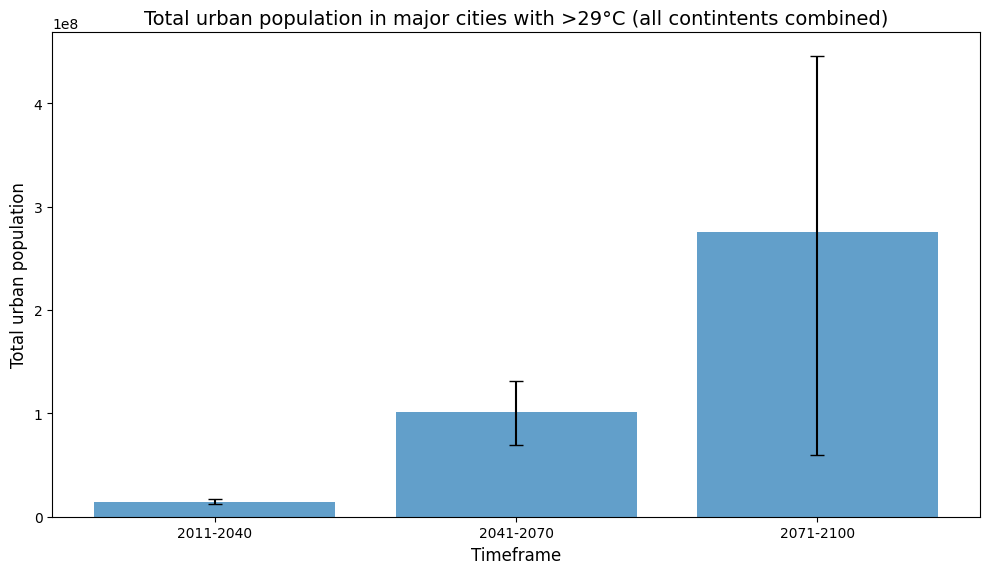

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read data from CSV files (as provided earlier)
csv_ssp1 = 'final_table_over_29_SSP1.csv'
csv_ssp3 = 'final_table_over_29_SSP3.csv'
csv_ssp5 = 'final_table_over_29_SSP5.csv'

# Read each CSV file into a dataframe
df_ssp1 = pd.read_csv(csv_ssp1)
df_ssp3 = pd.read_csv(csv_ssp3)
df_ssp5 = pd.read_csv(csv_ssp5)

# Function to calculate total population for all continents combined
def calculate_total_population(df_ssp1, df_ssp3, df_ssp5, period_column_suffix):
    total_pop = {
        'SSP1': df_ssp1[f'Total_Pop_{period_column_suffix}'].sum(),
        'SSP3': df_ssp3[f'Total_Pop_{period_column_suffix}'].sum(),
        'SSP5': df_ssp5[f'Total_Pop_{period_column_suffix}'].sum()
    }
    total_pop['Mean'] = (total_pop['SSP1'] + total_pop['SSP3'] + total_pop['SSP5']) / 3
    total_pop['Min'] = min(total_pop['SSP1'], total_pop['SSP3'], total_pop['SSP5'])
    total_pop['Max'] = max(total_pop['SSP1'], total_pop['SSP3'], total_pop['SSP5'])
    return total_pop

# Calculate total population for each period
total_pop_2011_2040 = calculate_total_population(df_ssp1, df_ssp3, df_ssp5, '2011_2040')
total_pop_2041_2070 = calculate_total_population(df_ssp1, df_ssp3, df_ssp5, '2041_2070')
total_pop_2071_2100 = calculate_total_population(df_ssp1, df_ssp3, df_ssp5, '2071_2100')

# Step 2: Plotting total population summed up for all continents
fig, ax = plt.subplots(figsize=(10, 6))

# Combine total populations into a dataframe for easier plotting
total_pop_df = pd.DataFrame([total_pop_2011_2040, total_pop_2041_2070, total_pop_2071_2100],
                            index=['2011-2040', '2041-2070', '2071-2100'])

# Plot the total population for each period with uncertainty
x = total_pop_df.index
ax.bar(x, total_pop_df['Mean'], yerr=[total_pop_df['Mean'] - total_pop_df['Min'], total_pop_df['Max'] - total_pop_df['Mean']],
       capsize=5, alpha=0.7)

# Add titles and labels
ax.set_title('Total urban population in major cities with >29°C (all contintents combined)', fontsize=14)
ax.set_ylabel('Total urban population', fontsize=12)
ax.set_xlabel('Timeframe', fontsize=12)


# Display the plot
plt.tight_layout()
plt.show()


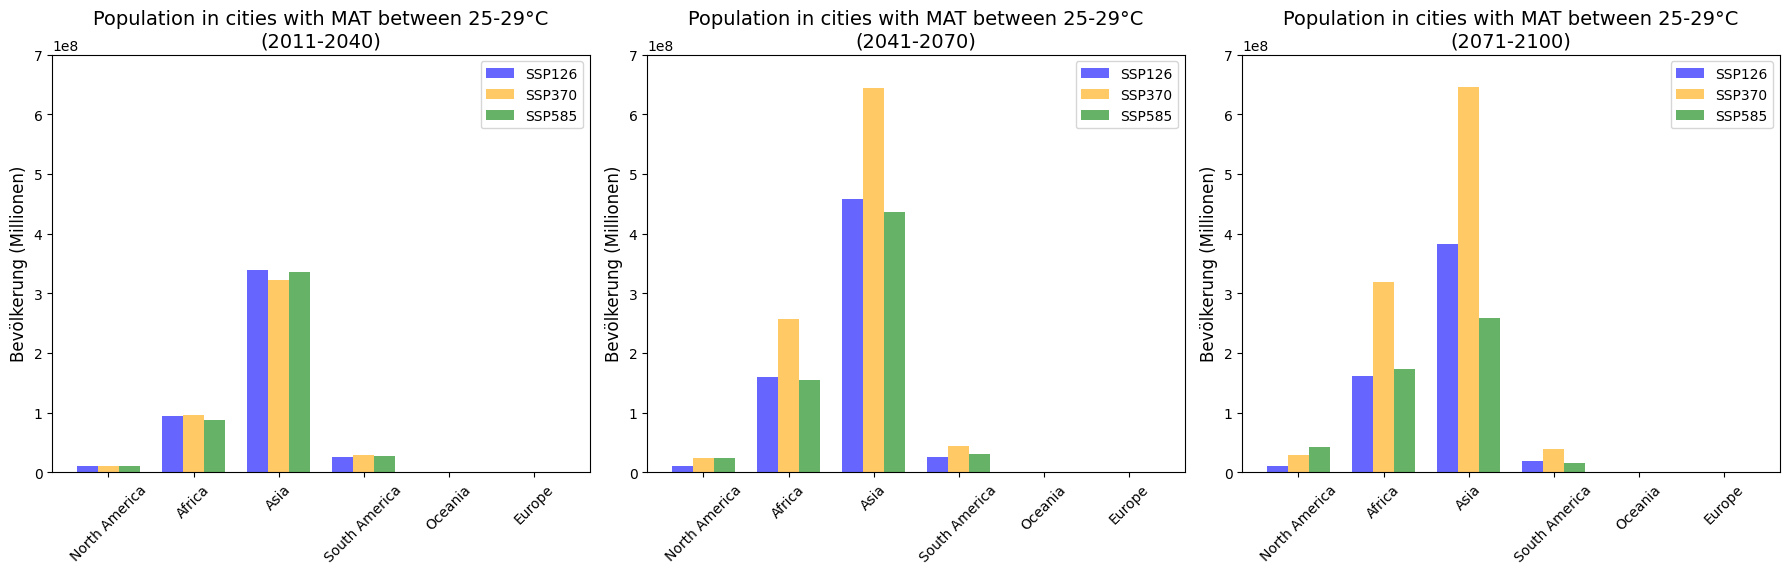

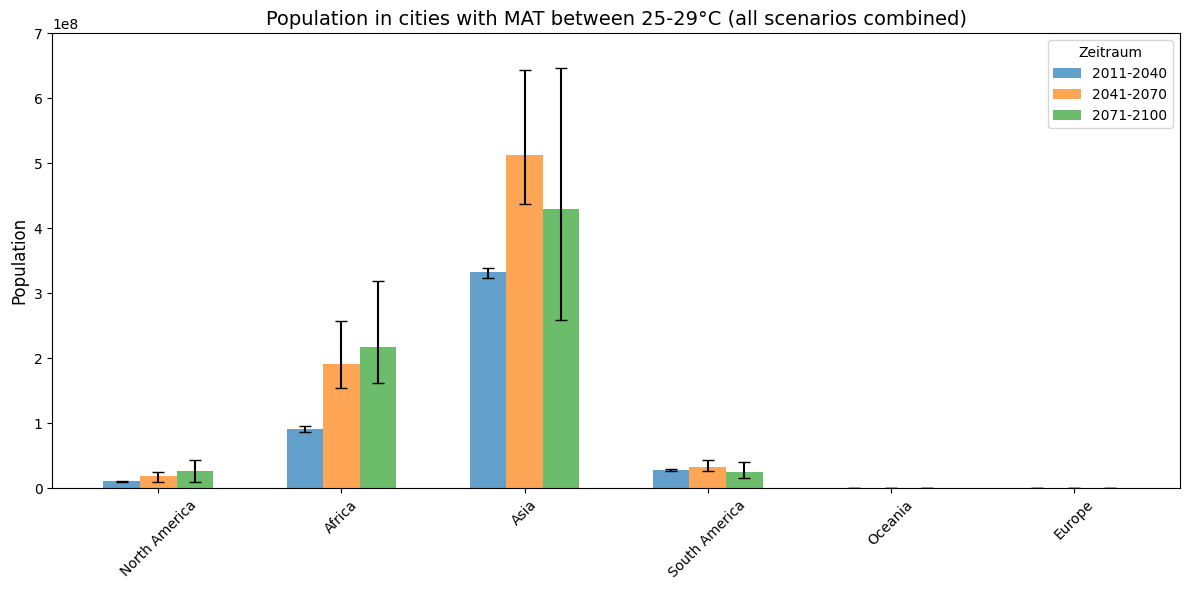

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read data from CSV files for cities with 25-29°C temperatures
csv_ssp1 = 'final_table_25_to_29_SSP1.csv'
csv_ssp3 = 'final_table_25_to_29_SSP3.csv'
csv_ssp5 = 'final_table_25_to_29_SSP5.csv'

# Read each CSV file into a dataframe
df_ssp1 = pd.read_csv(csv_ssp1)
df_ssp3 = pd.read_csv(csv_ssp3)
df_ssp5 = pd.read_csv(csv_ssp5)

# Combine the data for each period into a single dataframe
def combine_scenarios(df_ssp1, df_ssp3, df_ssp5, period_column_suffix):
    combined_df = pd.DataFrame({
        'Continent': df_ssp1['Continent'],
        'SSP1': df_ssp1[f'Total_Pop_{period_column_suffix}'],
        'SSP3': df_ssp3[f'Total_Pop_{period_column_suffix}'],
        'SSP5': df_ssp5[f'Total_Pop_{period_column_suffix}']
    })
    combined_df['Mean'] = combined_df[['SSP1', 'SSP3', 'SSP5']].mean(axis=1)
    combined_df['Min'] = combined_df[['SSP1', 'SSP3', 'SSP5']].min(axis=1)
    combined_df['Max'] = combined_df[['SSP1', 'SSP3', 'SSP5']].max(axis=1)
    return combined_df

# Combine data for each period
combined_2011_2040 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2011_2040')
combined_2041_2070 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2041_2070')
combined_2071_2100 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2071_2100')

# Step 2: Scenario-Specific Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.25  # Width of each bar

for i, (period, combined_df) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                              [combined_2011_2040, combined_2041_2070, combined_2071_2100])):
    x = np.arange(len(combined_df['Continent']))  # Create a range for the x positions
    axes[i].bar(x - bar_width, combined_df['SSP1'], width=bar_width, label='SSP126', alpha=0.6, color='blue')
    axes[i].bar(x, combined_df['SSP3'], width=bar_width, label='SSP370', alpha=0.6, color='orange')
    axes[i].bar(x + bar_width, combined_df['SSP5'], width=bar_width, label='SSP585', alpha=0.6, color='green')
    axes[i].set_title(f'Population in cities with MAT between 25-29°C\n({period})', fontsize=14)
    axes[i].set_ylabel('Population', fontsize=12)
    axes[i].set_ylim(0, 7e8)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(combined_df['Continent'], rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Step 3: Merged Scenario Plot with Uncertainty Bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(combined_2011_2040['Continent']))
bar_width = 0.2  # Width of each bar for merged plot

for i, (period, combined_df, offset) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                                      [combined_2011_2040, combined_2041_2070, combined_2071_2100],
                                                      [-bar_width, 0, bar_width])):
    ax.bar(x + offset, combined_df['Mean'], width=bar_width,
           yerr=[combined_df['Mean'] - combined_df['Min'], combined_df['Max'] - combined_df['Mean']],
           label=f'{period}', alpha=0.7, capsize=4)

ax.set_title('Population in cities with MAT between 25-29°C (all scenarios combined)', fontsize=14)
ax.set_ylabel('Population', fontsize=12)
ax.set_ylim(0, 7e8)
ax.set_xticks(x)
ax.set_xticklabels(combined_2011_2040['Continent'], rotation=45)
ax.legend(title='Zeitraum')

plt.tight_layout()
plt.show()


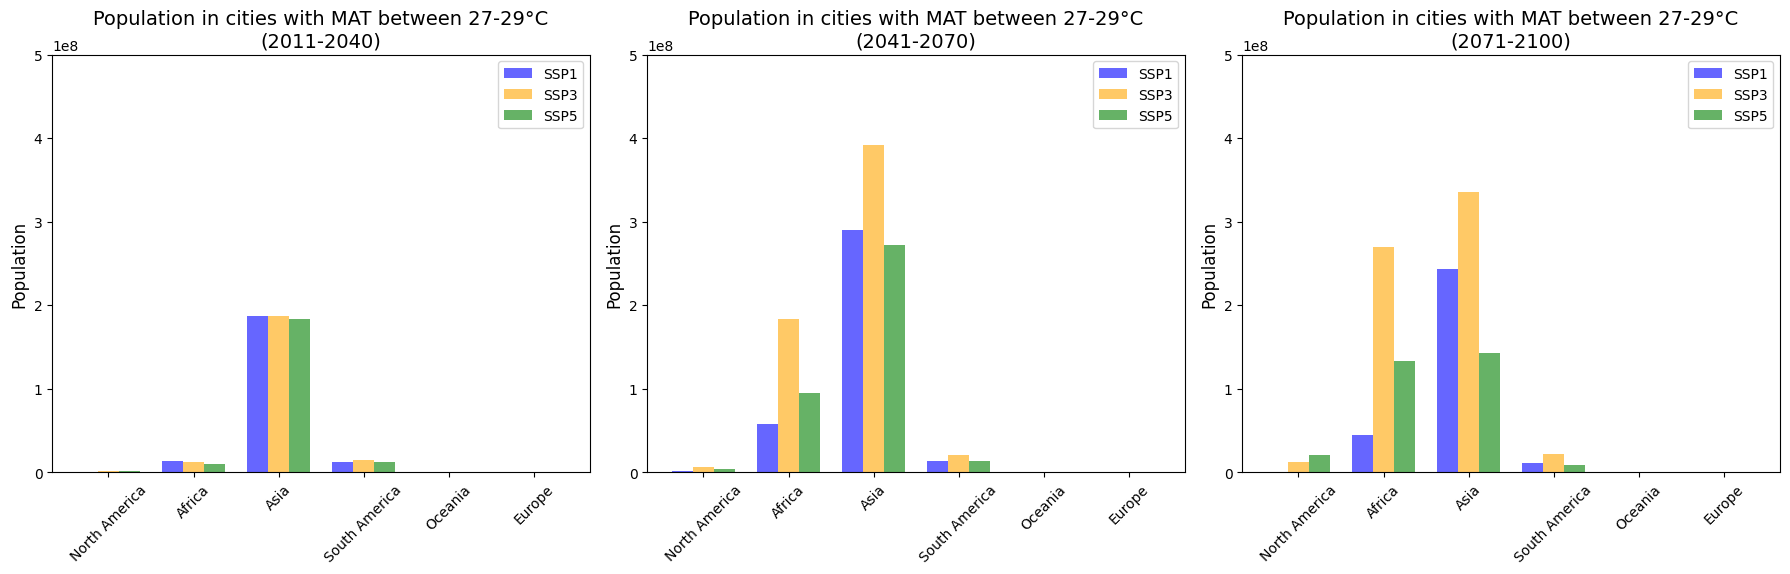

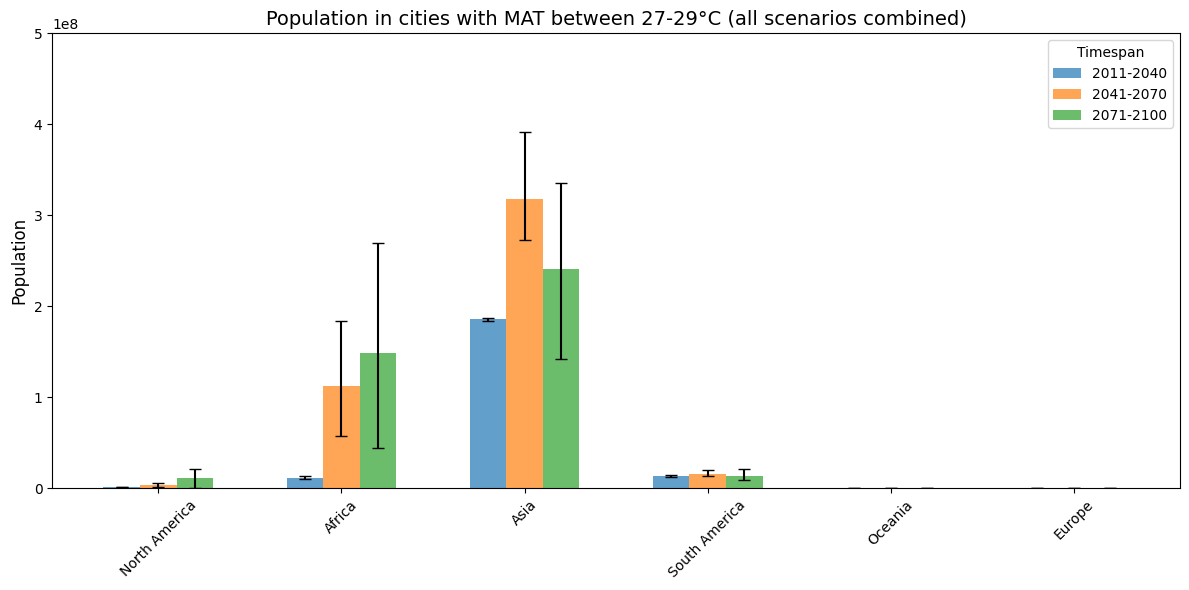

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Read data from CSV files for cities with 25-29°C temperatures
csv_ssp1 = 'final_table_27_to_29_SSP1.csv'
csv_ssp3 = 'final_table_27_to_29_SSP3.csv'
csv_ssp5 = 'final_table_27_to_29_SSP5.csv'

# Read each CSV file into a dataframe
df_ssp1 = pd.read_csv(csv_ssp1)
df_ssp3 = pd.read_csv(csv_ssp3)
df_ssp5 = pd.read_csv(csv_ssp5)

# Combine the data for each period into a single dataframe
def combine_scenarios(df_ssp1, df_ssp3, df_ssp5, period_column_suffix):
    combined_df = pd.DataFrame({
        'Continent': df_ssp1['Continent'],
        'SSP1': df_ssp1[f'Total_Pop_{period_column_suffix}'],
        'SSP3': df_ssp3[f'Total_Pop_{period_column_suffix}'],
        'SSP5': df_ssp5[f'Total_Pop_{period_column_suffix}']
    })
    combined_df['Mean'] = combined_df[['SSP1', 'SSP3', 'SSP5']].mean(axis=1)
    combined_df['Min'] = combined_df[['SSP1', 'SSP3', 'SSP5']].min(axis=1)
    combined_df['Max'] = combined_df[['SSP1', 'SSP3', 'SSP5']].max(axis=1)
    return combined_df

# Combine data for each period
combined_2011_2040 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2011_2040')
combined_2041_2070 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2041_2070')
combined_2071_2100 = combine_scenarios(df_ssp1, df_ssp3, df_ssp5, '2071_2100')

# Step 2: Scenario-Specific Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

bar_width = 0.25  # Width of each bar

for i, (period, combined_df) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                              [combined_2011_2040, combined_2041_2070, combined_2071_2100])):
    x = np.arange(len(combined_df['Continent']))  # Create a range for the x positions
    axes[i].bar(x - bar_width, combined_df['SSP1'], width=bar_width, label='SSP1', alpha=0.6, color='blue')
    axes[i].bar(x, combined_df['SSP3'], width=bar_width, label='SSP3', alpha=0.6, color='orange')
    axes[i].bar(x + bar_width, combined_df['SSP5'], width=bar_width, label='SSP5', alpha=0.6, color='green')
    axes[i].set_title(f'Population in cities with MAT between 27-29°C\n({period})', fontsize=14)
    axes[i].set_ylabel('Population', fontsize=12)
    axes[i].set_ylim(0, 5e8)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(combined_df['Continent'], rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()

# Step 3: Merged Scenario Plot with Uncertainty Bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(combined_2011_2040['Continent']))
bar_width = 0.2  # Width of each bar for merged plot

for i, (period, combined_df, offset) in enumerate(zip(['2011-2040', '2041-2070', '2071-2100'], 
                                                      [combined_2011_2040, combined_2041_2070, combined_2071_2100],
                                                      [-bar_width, 0, bar_width])):
    ax.bar(x + offset, combined_df['Mean'], width=bar_width,
           yerr=[combined_df['Mean'] - combined_df['Min'], combined_df['Max'] - combined_df['Mean']],
           label=f'{period}', alpha=0.7, capsize=4)

ax.set_title('Population in cities with MAT between 27-29°C (all scenarios combined)', fontsize=14)
ax.set_ylabel('Population', fontsize=12)
ax.set_ylim(0, 5e8)
ax.set_xticks(x)
ax.set_xticklabels(combined_2011_2040['Continent'], rotation=45)
ax.legend(title='Timespan')

plt.tight_layout()
plt.show()